# **Lab 3 : Visualizing waves with Python**
---

### **Description**

In this notebook, we will explore how different properties of a wave affect how the wave travels. We will also visualize the interference between two waves!

**Important note:** In this notebook, you will use **sliders** to interact with the graphs we use to visualize waves. In IBM Quantum Lab, **sliders do not have visible buttons!** They should just appear as gray bars. However, they still work: you can click-and-hold anywhere on them and then drag to the left or right to adjust their value, and the value of the slider should still be indicated numerically.

<br>

### **Lab Structure**
**Part 1**: Defining the wave

**Part 2**: Interfering two waves

<br>

### **Goals**
By the end of this lab, you will:
* be able to define a wave as a function of constituent parameters using Python.
* be able to observe and explain the behavior of a wave equation upon updating parameters at different times of the wave's existance.
* be able to understand and define wave interference.
* be able to perform the same operations as performed on single waves, on interfering waves.

<br>

**Before starting, run the code below to import all necessary functions and libraries.**



In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib widget

ModuleNotFoundError: No module named 'ipympl'

---
## **Part 1: Defining the wave**
---

First, here is the wave equation we showed you in the lecture. It describes a wave traveling in one dimension:

## <center>$y = A\cos\left[2\pi\left(\dfrac{x-vt}{\lambda}\right) + \phi_0\right]$</center>

Recall that $\lambda$ (lambda) represents the **wavelength**, $A$ represents the **amplitude**, $v$ represents the **wave speed**, and $\phi_0$ (phi-naught) represents a **fixed phase offset**. Last, $x$ and $t$ respectively represent position and time.

Before we begin visualizing these waves, we should define some default wave parameters. We will define the default **wavelength** `wavelengthdefault`, the default **phase offset** `phaseoffsetdefault`, the default **amplitude** `amplitudedefault` and the default **wave speed** (as the speed of light). We will play around with some of these parameters in the next blocks.

Note the units of `wavelengthdefault`, `phaseoffsetdefault`, and `wavespeed`. **Can you express the wave speed in m/s and the phase offset in degrees?**

#### **Problem #1:**
---

Define the default wave parameters. We will toggle these parameters in later problems and observe how the wave changes.


In [ ]:
# COMPLETE THIS SOLUTION

wavelengthdefault = 0.98 # default wavelength in µm
phaseoffsetdefault = np.pi # default phase offset in radians. How many degrees is this?
amplitudedefault = 10 # default wave amplitude (arbitrary units)
wavespeed = 0.299792458 # speed of light in um/fs. What would this be in meters per second?
t_start = 0 # Start time of the wave

# Define position range to view
xmin = 0
xmax = 2*wavelengthdefault
x = np.arange(xmin,xmax,wavelengthdefault/100) # create list of positions for plot (in um)

# COMPLETE THE WAVE EQUATION AS DESCRIBED IN THE PREVIOUS BLOCK
wave = amplitudedefault*np.sin(2 * np.pi * ((x - wavespeed * t_start) / wavelengthdefault) + phaseoffsetdefault)
print(wave)

[ 1.22464680e-15 -6.27905195e-01 -1.25333234e+00 -1.87381315e+00
 -2.48689887e+00 -3.09016994e+00 -3.68124553e+00 -4.25779292e+00
 -4.81753674e+00 -5.35826795e+00 -5.87785252e+00 -6.37423990e+00
 -6.84547106e+00 -7.28968627e+00 -7.70513243e+00 -8.09016994e+00
 -8.44327926e+00 -8.76306680e+00 -9.04827052e+00 -9.29776486e+00
 -9.51056516e+00 -9.68583161e+00 -9.82287251e+00 -9.92114701e+00
 -9.98026728e+00 -1.00000000e+01 -9.98026728e+00 -9.92114701e+00
 -9.82287251e+00 -9.68583161e+00 -9.51056516e+00 -9.29776486e+00
 -9.04827052e+00 -8.76306680e+00 -8.44327926e+00 -8.09016994e+00
 -7.70513243e+00 -7.28968627e+00 -6.84547106e+00 -6.37423990e+00
 -5.87785252e+00 -5.35826795e+00 -4.81753674e+00 -4.25779292e+00
 -3.68124553e+00 -3.09016994e+00 -2.48689887e+00 -1.87381315e+00
 -1.25333234e+00 -6.27905195e-01 -2.44929360e-15  6.27905195e-01
  1.25333234e+00  1.87381315e+00  2.48689887e+00  3.09016994e+00
  3.68124553e+00  4.25779292e+00  4.81753674e+00  5.35826795e+00
  5.87785252e+00  6.37423

#### **Problem #2:**
---

Define the same default wave using a cosine operation instead of a sine operation as part of the equation. Observe how the two are different.

In [ ]:
# COMPLETE THIS SOLUTION

# default parameters
wavelengthdefault = 0.98
phaseoffsetdefault = np.pi
amplitudedefault = 10
wavespeed = 0.299792458
t_start = 0

# Define position range to view
xmin = 0
xmax = 2*wavelengthdefault
x = np.arange(xmin,xmax,wavelengthdefault/100)

wave = amplitudedefault*np.cos(2 * np.pi * ((x - wavespeed * t_start) / wavelengthdefault) + phaseoffsetdefault)
print(wave)

[-1.00000000e+01 -9.98026728e+00 -9.92114701e+00 -9.82287251e+00
 -9.68583161e+00 -9.51056516e+00 -9.29776486e+00 -9.04827052e+00
 -8.76306680e+00 -8.44327926e+00 -8.09016994e+00 -7.70513243e+00
 -7.28968627e+00 -6.84547106e+00 -6.37423990e+00 -5.87785252e+00
 -5.35826795e+00 -4.81753674e+00 -4.25779292e+00 -3.68124553e+00
 -3.09016994e+00 -2.48689887e+00 -1.87381315e+00 -1.25333234e+00
 -6.27905195e-01 -1.83697020e-15  6.27905195e-01  1.25333234e+00
  1.87381315e+00  2.48689887e+00  3.09016994e+00  3.68124553e+00
  4.25779292e+00  4.81753674e+00  5.35826795e+00  5.87785252e+00
  6.37423990e+00  6.84547106e+00  7.28968627e+00  7.70513243e+00
  8.09016994e+00  8.44327926e+00  8.76306680e+00  9.04827052e+00
  9.29776486e+00  9.51056516e+00  9.68583161e+00  9.82287251e+00
  9.92114701e+00  9.98026728e+00  1.00000000e+01  9.98026728e+00
  9.92114701e+00  9.82287251e+00  9.68583161e+00  9.51056516e+00
  9.29776486e+00  9.04827052e+00  8.76306680e+00  8.44327926e+00
  8.09016994e+00  7.70513

#### **Problem #3:**
---

Change the initial parameters from the problems above one by one, implement in the code block below, and observe the different effects when changing the initial parameters and how they affect the wave behaviour when you toggle them.

In [ ]:
# COMPLETE THIS SOLUTION

# default parameters
wavelengthdefault = 0.98
phaseoffsetdefault = np.pi
amplitudedefault = 10
wavespeed = 0.299792458 # speed of light in um/fs. (*we don't really change this unless the wave travels in a different medium*)
t_start = 0

xmin = 0
xmax = 2*wavelengthdefault
x = np.arange(xmin,xmax,wavelengthdefault/100) # list of positions in nm

wave = amplitudedefault*np.sin(2 * np.pi * ((x - wavespeed * t_start) / wavelengthdefault) + phaseoffsetdefault)

#### **Problem #4: Changing the wavelength**
---

Now, let's adjust the parameters of this wave! To start off, let's just play around with one parameter: the **wavelength**. Run the block below, observe the generated plot and then **use the slider generated below the plot to adjust/toggle the wavelength of the wave.** How does the wave change?

(Don't worry about the details of the code for generating this plot - we will learn more about how plots are created in python later!)

interactive(children=(FloatSlider(value=10.0, description='wavelength', max=10.0, min=0.1), Output()), _dom_cl…

<function __main__.update(wavelength=980)>

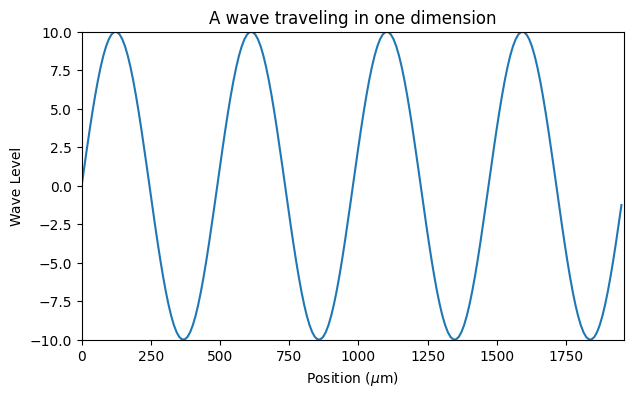

In [ ]:
# COMPLETE THIS SOLUTION

fig, ax = plt.subplots(figsize=(7, 4))
line1, = ax.plot(x, wave)
ax.set_ylabel('Wave Level')
ax.set_xlabel('Position ($\mu$m)')
ax.set_title('A wave traveling in one dimension')
fig.patch.set_facecolor('white')
plt.ylim(-10,10)
plt.xlim(0,xmax)

def update (wavelength = wavelengthdefault):
    wave = amplitudedefault*np.sin(2 * np.pi * ((x - wavespeed * t_start) / wavelength) + phaseoffsetdefault)
    line1.set_ydata(wave)
    fig.canvas.draw_idle()

widgets.interact(update,wavelength = (0.10,10.00))

#### **Problem #5:**
---

Define the wave function on your own for a figure size of (5, 5), ylim (-15, 10) and xlim (0, xmax).

interactive(children=(FloatSlider(value=0.98, description='wavelength', max=10.0, min=0.1), Output()), _dom_cl…

<function __main__.update(wavelength=0.98)>

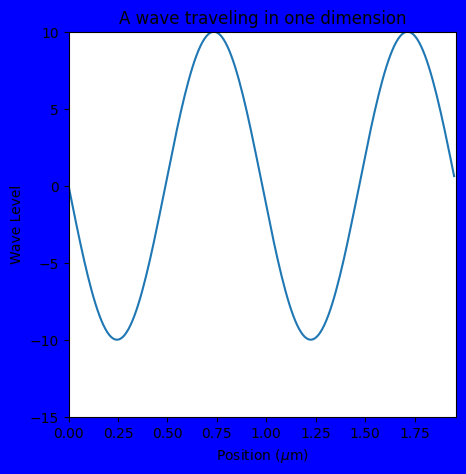

In [ ]:
# COMPLETE THIS SOLUTION

fig, ax = plt.subplots(figsize = (5, 5))

line1, = ax.plot(x, wave)

# Set labels and titles for ax
ax.set_ylabel('Wave Level')
ax.set_xlabel('Position ($\mu$m)')
ax.set_title('A wave traveling in one dimension')

# Add facecolor `blue` instead of white
fig.patch.set_facecolor('blue')

# Add ylim and xlim
plt.ylim(-15,10)
plt.xlim(0,xmax)

# Define the `update` wave function
def update (wavelength = wavelengthdefault):
    wave = amplitudedefault*np.sin(2 * np.pi * ((x - wavespeed * t_start) / wavelength) + phaseoffsetdefault)
    line1.set_ydata(wave)
    fig.canvas.draw_idle()

# Add an interative widget with limits corresponding to ylim and xlim
widgets.interact(update,wavelength = (0.10,10.00))

#### **Problem #6:**
---

Define your own wavelength updating function by changing the initial parameters and toggle to see how it is different from the previous problems.

interactive(children=(FloatSlider(value=0.98, description='wavelength', max=10.0, min=0.1), Output()), _dom_cl…

<function __main__.update(wavelength=0.98)>

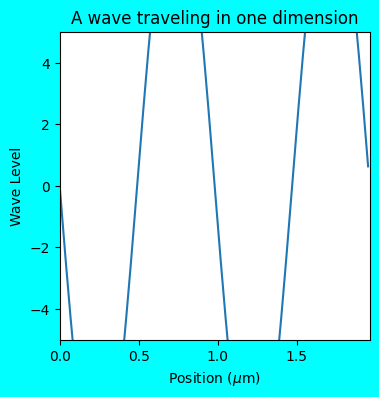

In [ ]:
# COMPLETE THIS SOLUTION

# Define initial parameters fig, ax, line1

# Set labels and titles

# Change facecolor

# Add ylim and xlim

# Define the `update` wave function

# Add an interative widget with limits corresponding to ylim and xlim


fig, ax = plt.subplots(figsize = (4, 4))

line1, = ax.plot(x, wave)

# Set labels and titles for ax
ax.set_ylabel('Wave Level')
ax.set_xlabel('Position ($\mu$m)')
ax.set_title('A wave traveling in one dimension')

# Add facecolor `blue` instead of white
fig.patch.set_facecolor('cyan')

# Add ylim and xlim
plt.ylim(-5,5)
plt.xlim(0,xmax)

# Define the `update` wave function
def update (wavelength = wavelengthdefault):
    wave = amplitudedefault*np.sin(2 * np.pi * ((x - wavespeed * t_start) / wavelength) + phaseoffsetdefault)
    line1.set_ydata(wave)
    fig.canvas.draw_idle()

# Add an interative widget with limits corresponding to ylim and xlim
widgets.interact(update,wavelength = (0.10,10.00))

#### **Problem #7: Changing more wave parameters**
---

Now, let's try adjusting more of the parameters of the wave, again **using the interactive elements below the plot.** Think about how changing each parameter affects the wave. (If you're feeling lost, just start changing things and **look for patterns**)

**Important:** When you are done setting the other parameters, **go to the first slider and scroll slowly from left to right to make time pass!**

In [ ]:
# COMPLETE THIS SOLUTION

# Define initial parameters fig, ax, line1

# Set labels and titles

# Change facecolor

# Add ylim and xlim

def update (time = 0, wavelength = wavelengthdefault, amplitude = amplitudedefault, phaseoffset = phaseoffsetdefault, velocitysign = "-"):
    if velocitysign == "-":
        wave = # Define wave if velocity sign in equation is minus
        fig.canvas.draw_idle()
    elif velocitysign == "+":
        wave = # Define wave if velocity sign in equation is plus
    line1.set_ydata(wave)
    fig.canvas.draw_idle()

widgets.interact(update, time = (0.00,10.00), wavelength = (0.10,10.00), amplitude = (0.00,10.00), phaseoffset = (0.00, 2*np.pi), velocitysign = ['-','+'])

#### **Problem #8: (optional)**
---

**Challenge:** Based on the wave equation you saw earlier, **predict how increasing or decreasing each parameter will affect the wave.**

---
## **Part 2: Interfering two waves**
---

So far, we have only dealt with a single wave. Now suppose we have two waves of the same type in the same region of space - how do they interact? Answer: they **interfere**! Mathematically, wave interference just looks like **the two original waves added together**.

## <center>$y_A = A_A\cos\left[2\pi\left(\dfrac{x \pm v_At}{\lambda_A}\right) + \phi_A\right] \\ y_B = A_B\cos\left[2\pi\left(\dfrac{x \pm v_Bt}{\lambda_B}\right) + \phi_B\right] \\ y_{AB} = y_A+y_B$</center>

You don't have to do any math here - we can use python to calculate and add our two waves numerically! This gives us an easy way to visualize the phenomenon of **interference** and see how changing the parameters of the two waves impacts the interference. We will call our two waves **wave A** and **wave B**.

#### **Problem #1:**
---

Define the default parameters of the two waves - wave A and wave B, and then proceed to define the sum of the two waves as `wavesum`.


In [ ]:
# COMPLETE THIS SOLUTION

# Default parameters for wave A
phaseoffsetAdefault = np.pi
amplitudeAdefault = 10
wavespeedA = wavespeed

# Define default parameters for wave B
phaseoffsetBdefault = 0
amplitudeBdefault = 10
wavespeedB = wavespeed

# Define start time
t_start = 5

# Define the wavesum variable from the equations above
waveA = amplitudeAdefault*np.sin(2 * np.pi * ((x - wavespeedA * t_start) / wavelengthdefault) + phaseoffsetAdefault)
waveB = amplitudeBdefault*np.sin(2 * np.pi * ((x - wavespeedB * t_start) / wavelengthdefault) + phaseoffsetBdefault)
wavesum = waveA + waveB

#### **Problem #2:**
---

Let us visualize the interfering waves now! To keep things simple, let us first vary just the **phase offsets** `phaseA` and `phaseB` of the two waves, keeping everything else the same. After this, we will try changing other parameters of the two waves as well.

interactive(children=(FloatSlider(value=3.141592653589793, description='phaseA', max=6.283185307179586), Float…

<function __main__.update(phaseA=3.141592653589793, phaseB=0)>

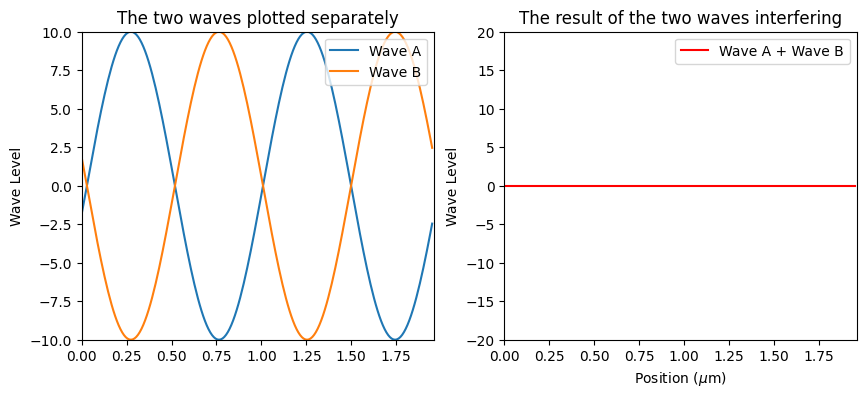

In [ ]:
# COMPLETE YOUR SOLUTION

# Visualizing wave interference

fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
fig1.patch.set_facecolor('white')
#plt.tight_layout()

# Plotting the two waves separately
plt.subplot(1,2,1)
lineA, = ax1[0].plot(x, waveA, label = "Wave A")
lineB, = ax1[0].plot(x, waveB, label = "Wave B")
plt.legend(loc="upper right")
ax1[0].set_ylabel('Wave Level')
ax1[0].set_title('The two waves plotted separately')
plt.ylim(-10,10)
plt.xlim(0,xmax)

# Plotting the sum of the two waves
plt.subplot(1,2,2)
linesum, = ax1[1].plot(x, wavesum, color = "red", label = "Wave A + Wave B")
plt.legend(loc="upper right")
ax1[1].set_ylabel('Wave Level')
ax1[1].set_xlabel('Position ($\mu$m)')
ax1[1].set_title('The result of the two waves interfering')
fig1.patch.set_facecolor('white')
plt.ylim(-20,20)
plt.xlim(0,xmax)

def update (phaseA = phaseoffsetAdefault, phaseB = phaseoffsetBdefault):
    waveA = amplitudeAdefault*np.sin(2 * np.pi * ((x - wavespeedA * t_start) / wavelengthdefault) + phaseA)
    waveB = amplitudeBdefault*np.sin(2 * np.pi * ((x - wavespeedB * t_start) / wavelengthdefault) + phaseB)
    lineA.set_ydata(waveA)
    lineB.set_ydata(waveB)
    linesum.set_ydata(waveA + waveB)
    fig1.canvas.draw_idle()

widgets.interact(update, phaseA = (0.00, 2*np.pi), phaseB = (0.00, 2*np.pi))

#### **Problem #3: (optional)**
---

**Activity:** Can you figure out what the **phases of the two waves** need to be for **completely constructive interference** (where the two waves add up perfectly) and **completely destructive interference** (where the two waves cancel out perfectly)?

#### **Problem #4:**
---

Now you are ready for the full picture - interfering two waves with access to all of the wave parameters we have discussed!

**Important:** As before, once you have set the other wave parameters, **slide the 'time' slider slowly from left to right to make time pass.**

interactive(children=(FloatSlider(value=5.0, description='time', max=10.0), FloatSlider(value=0.98, descriptio…

<function __main__.update(time=5, wvlngthA=0.98, wvlngthB=0.98, amplitudeA=10, amplitudeB=10, vsignA='-', vsignB='-', phaseA=3.141592653589793, phaseB=0)>

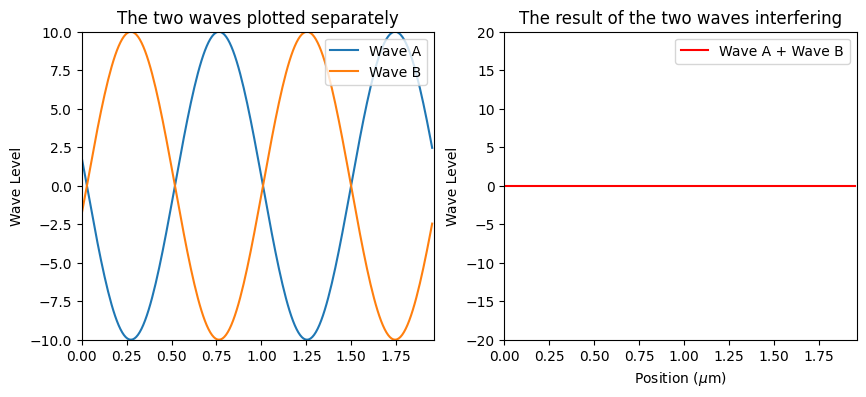

In [ ]:
# COMPLETE YOUR SOLUTION

# Changing other parameters of the two waves

fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
fig1.patch.set_facecolor('white')
#plt.tight_layout()

# Plotting the two waves separately

plt.subplot(1,2,1)
lineA, = ax1[0].plot(x, waveA, label = "Wave A")
lineB, = ax1[0].plot(x, waveB, label = "Wave B")
plt.legend(loc="upper right")
ax1[0].set_ylabel('Wave Level')
ax1[0].set_title('The two waves plotted separately')
plt.ylim(-10,10)
plt.xlim(0,xmax)

# Plotting the sum of the two waves
plt.subplot(1,2,2)
linesum, = ax1[1].plot(x, wavesum, color = "red", label = "Wave A + Wave B")
plt.legend(loc="upper right")
ax1[1].set_ylabel('Wave Level')
ax1[1].set_xlabel('Position ($\mu$m)')
ax1[1].set_title('The result of the two waves interfering')
fig1.patch.set_facecolor('white')
plt.ylim(-20,20)
plt.xlim(0,xmax)

def update (time = t_start, wvlngthA = wavelengthdefault, wvlngthB = wavelengthdefault, amplitudeA = amplitudedefault, amplitudeB = amplitudedefault, vsignA = "-", vsignB = "-", phaseA = phaseoffsetAdefault, phaseB = phaseoffsetBdefault):
    if vsignA == "-":
        waveA = -amplitudeAdefault*np.sin(2 * np.pi * ((x - wavespeedA * t_start) / wavelengthdefault) + phaseA)
        if vsignB == "-":
            waveB = -amplitudeBdefault*np.sin(2 * np.pi * ((x - wavespeedB * t_start) / wavelengthdefault) + phaseB)
        elif vsignB =="+":
            waveB = amplitudeBdefault*np.sin(2 * np.pi * ((x - wavespeedB * t_start) / wavelengthdefault) + phaseB)
    elif vsignA == "+":
        waveA = amplitudeAdefault*np.sin(2 * np.pi * ((x - wavespeedA * t_start) / wavelengthdefault) + phaseA)
        if vsignB == "-":
            waveB = -amplitudeBdefault*np.sin(2 * np.pi * ((x - wavespeedB * t_start) / wavelengthdefault) + phaseB)
        elif vsignB =="+":
            waveB = amplitudeBdefault*np.sin(2 * np.pi * ((x - wavespeedB * t_start) / wavelengthdefault) + phaseB)

    lineA.set_ydata(waveA)
    lineB.set_ydata(waveB)
    linesum.set_ydata(waveA + waveB)
    fig1.canvas.draw_idle()

widgets.interact(update, time = (0.00,10.00), wvlngthA = (0.10,10.00), wvlngthB = (0.10,10.00), amplitudeA = (0.00,10.00), amplitudeB = (0.00,10.00), vsignA = ["-","+"], vsignB = ["-","+"],  phaseA = (0.00, 2*np.pi), phaseB = (0.00, 2*np.pi))

#### **Problem #5: (optional)**
---

**Challenge:** Can you find parameters for the two waves such that the resulting wave is a **standing wave**? A standing wave **oscillates in place**, i.e. does not travel to the left or right over time!

#End of notebook
---
© 2023 The Coding School, All rights reserved